# Proyek Analisis Data: Bike-Sharing-Dataset
- Arya Pradipto
- M006D4KY2375@bangkit.academy
- arya_pradipto_m006d4ky2375_9KZX

## Menentukan Pertanyaan Bisnis

- Bagiamana variasi permintaan sewa pada  berbagai musim?
- Bagiamana faktor cuaca seperti suhu, kelembaban, dan kecepatan angin mempengatuhi penggunaan sepeda nya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [5]:
hari_df = pd.read_csv("~/proyek_akhir/day.csv")
hari_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
jam_df = pd.read_csv("~/proyek_akhir/hour.csv")
jam_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

**Menilai Hari_df**

memeriksa data dari Hari_df

In [8]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memastikan tidak ada missing values dari Hari_df



In [9]:
hari_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

mengecek duplikasi data dari jam_df

In [10]:
print ("Jumlah duplikasi: ", hari_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik dari kolom numerik dari hari_df

In [11]:
hari_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**Menilai jam_df**

memeriksa data dari jam_df

In [12]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memeriksa duplikasi dan parameter statistik dari jam_df

In [13]:
print ("Jumlah Duplikasi: ", jam_df.duplicated().sum())

Jumlah Duplikasi:  0


### Cleaning Data

Karena data ternyata sudah bersih, jadi tidak ada yang perlu dibersihkan!

## Exploratory Data Analysis (EDA)

### Explore ...

Untuk menjawab pertanyaan yang kesatu, pertama kita harus menggabungkan kedua .csv di bagian tanggal nya.

In [14]:
merged_df = pd.merge(jam_df, hari_df, on='dteday')

Menghitung total jumlah sewa sepeda per musim

In [15]:
demand_musim = merged_df.groupby('season_x')['cnt_x'].sum()


Selanjutnya kita mengihitung rata-rata dari jumlah sewa sepeda per musim

In [16]:
rata_rata= demand_musim /len(merged_df['dteday'].unique())
print (rata_rata)

season_x
1     644.798906
2    1256.619699
3    1451.612859
4    1151.317373
Name: cnt_x, dtype: float64


berdasarkan hasil tersebut, dapat diketahui bahwa :

- rata-rata musim semi = 645
- rata-rata musim panas = 1257
- rata-rata musim gugur = 1452
- rata-rata musim dingin = 1151

Maka dari itu dapat diketahui bahwa rata-rata jumlah sewa tertinggi adalah musim gugur(1452)

**Menjawab Pertanyaan yang kedua**

Karena kita sudah mempunyai merge antar kedua .csv nya selanjutnya kita tinggal mengelompokkan data nya berdasarkan kondisi cuaca lalu menghitung rata-rata jumlah sewa sepedanya

In [17]:
demand_cuaca = merged_df.groupby('weathersit_x')['cnt_x'].mean()
print (demand_cuaca)

weathersit_x
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt_x, dtype: float64


Dari hasil tersebut, sesuai file README :

- 1 = Clear, Few clouds, partly cloudy = 204
- 2 = Mist + Cloudy, Mist + Broken Clouds, Mist + Few clouds, Mist = 175
- 3 = Light snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered clouds = 111
- 4 = Heavy rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 74



## Visualization & Explanatory Analysis

### Pertanyaan 1:

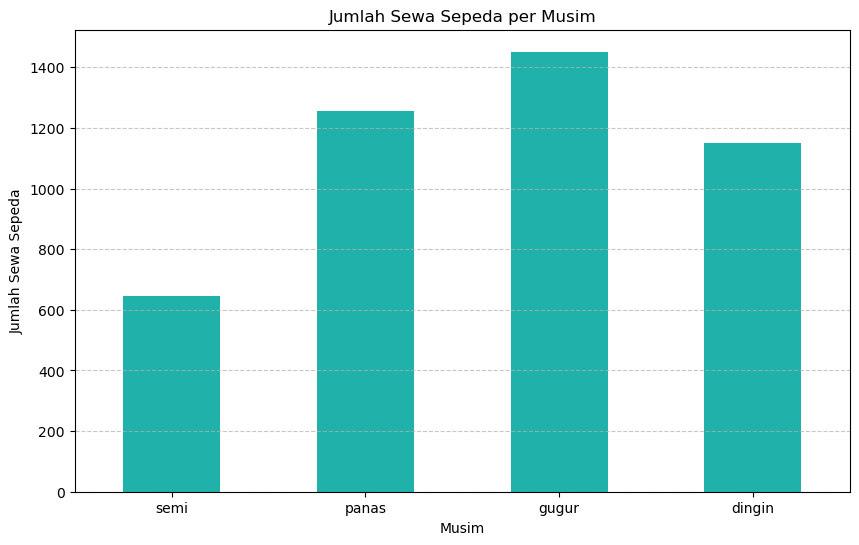

In [18]:
plt.figure(figsize=(10, 6))
rata_rata.plot(kind='bar', color='lightseagreen')
plt.title('Jumlah Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['semi', 'panas', 'gugur', 'dingin'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Seperti yang bisa dilihat pada grafik nya, bahwa ternyata Musim yang paling banyak menyewa sepeda nya adalah pada musim gugur dengan angka rata-rata 1452. Diangka kedua adalah musim panas dengan rata-rata 1257. Selanjutnya pada bulan ketiga adalah musim dingin dengan angka rata-rata 1151, dan yang terakhir musim semi dengan angka rata-rata 645.

### Pertanyaan 2:

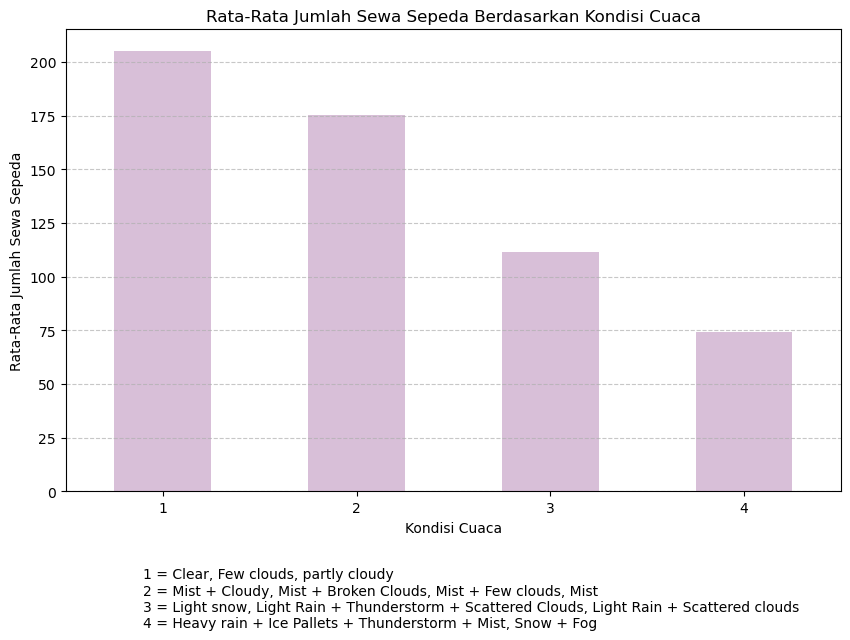

In [19]:
plt.figure(figsize=(10,6))
demand_cuaca.plot(kind='bar', color = 'thistle')
plt.title ('Rata-Rata Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Sewa Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha = 0.7)
notes = "1 = Clear, Few clouds, partly cloudy \n2 = Mist + Cloudy, Mist + Broken Clouds, Mist + Few clouds, Mist\n3 = Light snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered clouds \n4 = Heavy rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
plt.text(0.1, -0.3, notes, ha='left', va='bottom', fontsize=10, transform=plt.gca().transAxes)
plt.show()

Di tabel dari pertanyaan yang kedua, dapat dilihat bahwa cuaca yang paling banyak sewa sepeda nya adalah cuaca pertama yaitu **Clear, Few clouds, partly**. Lalu cuaca yang kedua adalah **Mist + Cloudy, Mist + Broken Clouds, Mist + Few clouds, Mist**. Cuaca yang ketiga adalah **Light snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered clouds**, dan cuaca paling sedikit penyewa sepeda nya adalah **Heavy rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**.

## Conclusion

**Conclution Pertanyaan 1** = rata-rata Jumlah sewa sepeda per musim yang paling banyak adalah pada musim **Gugur**. Pada musim gugur ada rata-rata sebesar 1452 orang yang menyewa sepeda.

**Conclution Pertanyaan 2** = Pada rata-rata jumlah sewa sepeda berdasarkan kondisi cuaca, cuaca yang paling banyak penyewa nya adalah cuaca **Clear, Few clouds, partly**. Lalu cuaca yang kedua adalah cuaca **Mist + Cloudy, Mist + Broken Clouds, Mist + Few clouds, Mist**. Cuaca ketiga yang paling banyak disewa adalah cuaca **Light snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered clouds**. Dan yang terakhir adalah **Heavy rain + Ice Pallets + thunderstorm + Mist, Snow + Fog**.